# Topics
In this lesson, you will learn about three main topics:

1. We will look from a high level at how you might go about validating your recommendations.
2. We will look at matrix factorization as a method to use machine learning to make recommendations.
3. We will look at combining recommendation techniques to make predictions to existing and new users and for existing and new items.

As we go through this lesson, you will come to realize that there are a lot of difficulties in working with recommendation engines which make them still an exciting field to study! This is especially true when you combine your recommendations with a specific product type.

Recommending movies, recommending restaurants, or recommending clothing might happen in a number of different ways. However, the techniques you will learn in this lesson are often extendable to any of these cases.

## Training and Testing Data For Recommendations
In the last lesson, you were making recommendations by providing a list of popular items, or a list of items that the user hadn't observed but that someone with similar tastes had observed. However, understanding if these recommendations are good in practice means that you have to deploy these recommendations to users and see how it impacts your metrics (sales, higher engagement, clicks, conversions, etc.).

You may not want your recommendations to go live to understand how well they work. In these cases, you will want to split your data into training and testing portions. In these cases, you can train your recommendation engine on a subset of the data, then you can test how well your recommendation engine performs on a test set of data before deploying your model to the world.

However, the cases you saw in the last lesson, where just a list of recommendations was provided, don't actually lend themselves very well to training and testing methods of evaluation. In the next upcoming pages, you will be introduced to matrix factorization, which actually does work quite well for these situations.

## Validating Your Recommendations
### Online Testing
For online methods of testing a recommender's performance, many of the methods you saw in the previous lesson work very well - you can deploy your recommendations and just watch your metrics carefully. It is common in practice to set up online recommendations to have an "old" version of recommended items, which is compared to a new page that uses a new recommendation strategy.

All ideas associated with A/B testing that you learned in the earlier lessons are critical to watching your metrics in online learning, and ultimately, choosing a recommendation strategy that works best for your products and customers.

### Offline Testing
In many cases, a company might not let you simply deploy your recommendations out into the real world any time you feel like it. Testing out your recommendations in a training-testing environment prior to deploying them is called offline testing.

The recommendation methods you built in the previous lesson actually don't work very well for offline testing. In offline testing, it is ideal to not just obtain a list of recommendations for each individual, because we ultimately don't know if a user doesn't use an item because they don't like it, or because they just haven't used it yet (but would like it). Rather, it would be great if we have an idea of how much each user would like each item using a predicted rating. Then we can compare this predicted rating to the actual rating any individual gives to an item in the future.

In the previous video, you saw an example of a user to whom we gave a list of movies that they still hadn't seen. Therefore, we couldn't tell how well we were doing with our recommendations. Techniques related to matrix factorization lend themselves nicely to solving this problem.

### User Groups
The final (possible) method of validating your recommendations is by having user groups give feedback on items you would recommend for them. Obtaining good user groups that are representative of your customers can be a challenge on its own. This is especially true when you have a lot of products and a very large consumer base.

## Singular Value Decomposition
In the next part of this lesson, you will first get exposure to Singular Value Decomposition, or SVD. We will soon see why this technique falls short for many recommendation problems. However, understanding traditional SVD approaches to matrix factorization is useful as a start to a number of matrix factorization techniques that are possible in practice.

In order to implement SVD for many recommendation engines, we will need to use a slightly modified approach known as FunkSVD. This approach proved to work incredibly well during the Netflix competition, and therefore, it is one of the most popular recommendation approaches in use today.

Let's first take a closer look at traditional SVD.

## Latent Factors
When performing SVD, we create a matrix of users by items (or customers by movies in our specific example), with user ratings for each item scattered throughout the matrix. An example is shown in the image below.

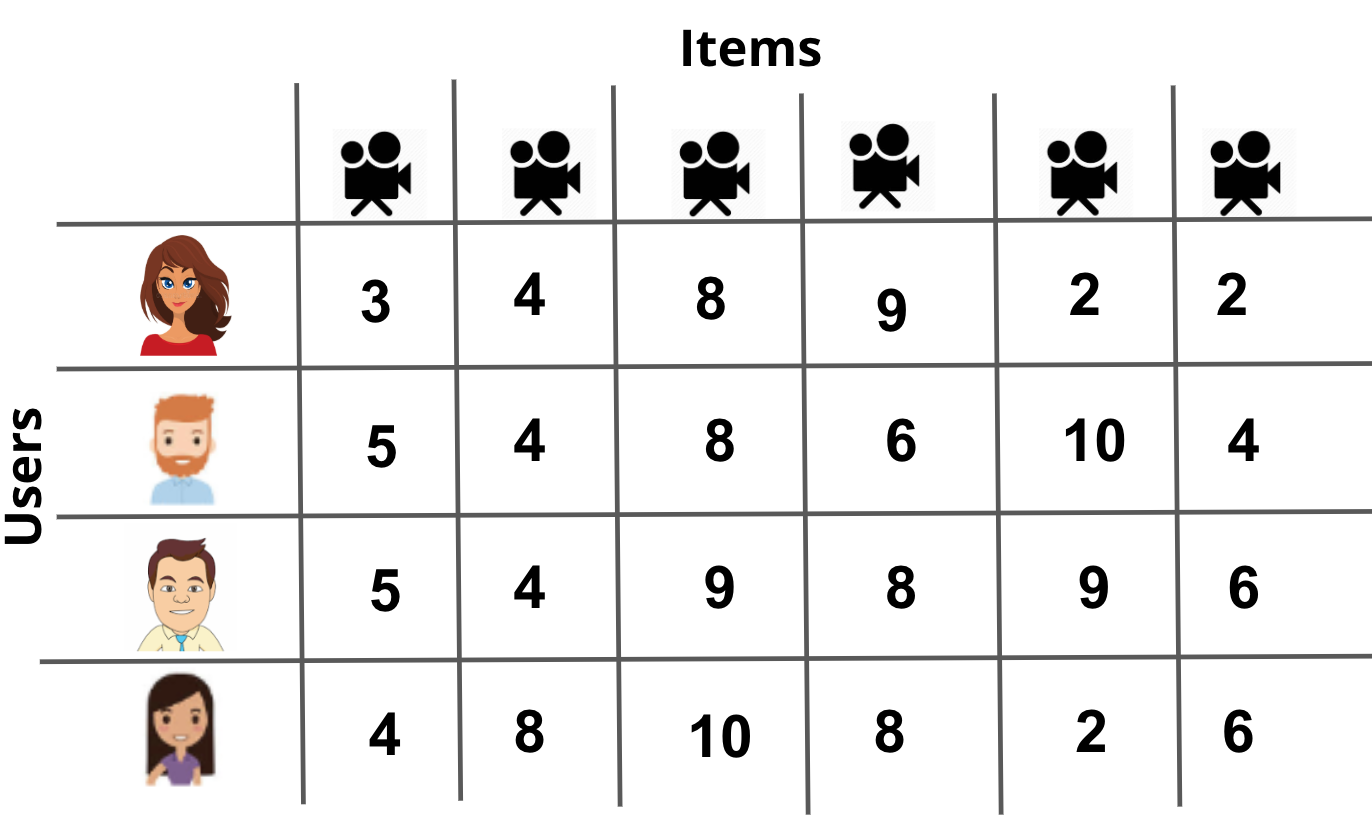

You can see that this matrix doesn't have any specific information about the users or items. Rather, it just holds the ratings that each user gave to each item. Using SVD on this matrix, we can find latent features related to the movies and customers. This is amazing because the dataset doesn't contain any information about the customers or movies!

## Singular Value Decomposition
Let's do a quick check of understanding. If we let AA be our user-item matrix, we can write the decomposition of that matrix in the following way.

Let **k** be the number of **latent features** used, **n** be the **number of users**, and **m** be the number of **items**. With this in mind, match each matrix to its corresponding dimensions. For the below, consider **rows-columns** as the structure.

$$A = U \Sigma V^T$$
 
U is A matrix that provides how users feel about latent features. is n * k

$\Sigma$ is A matrix that provides weights in descending order with how much each latent feature matters towards reconstructing the original user-item matrix. is k * k

V is A matrix that provides how items (movies in this case) relate to each latent feature . is m * k

### Singular Value Decomposition

So far in this lesson, you have gained some exposure to Singular Value Decomposition.  In this notebook, you will get some hands on practice with this technique.

Let's get started by reading in our libraries and setting up the data we will use throughout this notebook.

`1.` Run the cell below to create the **user_movie_subset** dataframe.  This will be the dataframe you will use for the first part of this notebook.

**Note: Unstacking the matrix here could take ~10 mins to run.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import svd_tests as t
%matplotlib inline

# Read in the datasets
movies = pd.read_csv('movies_clean1.csv')
reviews = pd.read_csv('reviews_clean1.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

# Create user-by-item matrix
user_items = reviews[['user_id', 'movie_id', 'rating']]
user_by_movie = user_items.groupby(['user_id', 'movie_id'])['rating'].max().unstack()

user_movie_subset = user_by_movie[[73486, 75314,  68646, 99685]].dropna(axis=0)
print(user_movie_subset)

movie_id  73486  75314  68646  99685
user_id                             
265        10.0   10.0   10.0   10.0
1023       10.0    4.0    9.0   10.0
1683        8.0    9.0   10.0    5.0
6571        9.0    8.0   10.0   10.0
11639      10.0    5.0    9.0    9.0
13006       6.0    4.0   10.0    6.0
14076       9.0    8.0   10.0    9.0
14725      10.0    5.0    9.0    8.0
23548       7.0    8.0   10.0    8.0
24760       9.0    5.0    9.0    7.0
28713       9.0    8.0   10.0    8.0
30685       9.0   10.0   10.0    9.0
34110      10.0    9.0   10.0    8.0
34430       5.0    8.0    5.0    8.0
35150      10.0    8.0   10.0   10.0
43294       9.0    9.0   10.0   10.0
46849       9.0    8.0    8.0    8.0
50556      10.0    8.0    1.0   10.0
51382       5.0    6.0   10.0   10.0
51410       8.0    7.0   10.0    7.0


In [3]:
user_by_movie.shape

(53968, 31245)

`2.` Now that you have the **user_movie_subset** matrix, use this matrix to correctly match each key to the correct value in the dictionary below.  Use the cells below the dictionary as necessary.

In [ ]:
# match each letter to the best statement in the dictionary below - each will be used at most once
a = 20
b = 68646
c = 'The Godfather'
d = 'Goodfellas'
e = 265
f = 30685
g = 4

sol_1_dict = {
    'the number of users in the user_movie_subset': 20,
    'the number of movies in the user_movie_subset': 4,
    'the user_id with the highest average ratings given': e,
    'the movie_id with the highest average ratings received': b,
    'the name of the movie that received the highest average rating': c
}


#test dictionary here
t.test1(sol_1_dict)

In [4]:
user_movie_subset.shape

(20, 4)

In [12]:
user_movie_subset.mean(axis = 1)

user_id
265      10.00
1023      8.25
1683      8.00
6571      9.25
11639     8.25
13006     6.50
14076     9.00
14725     8.00
23548     8.25
24760     7.50
28713     8.75
30685     9.50
34110     9.25
34430     6.50
35150     9.50
43294     9.50
46849     8.25
50556     7.25
51382     7.75
51410     8.00
dtype: float64

In [13]:
user_movie_subset.mean(axis = 0)

movie_id
73486    8.60
75314    7.35
68646    9.00
99685    8.50
dtype: float64

In [15]:
movies[movies['movie_id'] == 68646]

,movie_id,movie,genre,date,1800's,1900's,2000's,History,News,Horror,...,Fantasy,Romance,Game-Show,Action,Documentary,Animation,Comedy,Short,Western,Thriller
3706,68646,The Godfather (1972),Crime|Drama,1972,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that you have a little more context about the matrix we will be performing Singular Value Decomposition on, we're going to do just that.  To get started, let's remind ourselves about the dimensions of each of the matrices we are going to get back.   Essentially, we are going to split the **user_movie_subset** matrix into three matrices:

$$ U \Sigma V^T $$


`3.` Given what you learned in the previous parts of this lesson, provide the dimensions for each of the matrices specified above using the dictionary below.

In [ ]:
# match each letter in the dictionary below - a letter may appear more than once.
a = 'a number that you can choose as the number of latent features to keep'
b = 'the number of users'
c = 'the number of movies'
d = 'the sum of the number of users and movies'
e = 'the product of the number of users and movies'

sol_2_dict = {
    'the number of rows in the U matrix': b, 
    'the number of columns in the U matrix': a, 
    'the number of rows in the V transpose matrix': a, 
    'the number of columns in the V transpose matrix': c
}

#test dictionary here
t.test2(sol_2_dict)

Now let's verify the above dimensions by performing SVD on our user-movie matrix.

`4.` Below you can find the code used to perform SVD in numpy.  You can see more about this functionality in the [documentation here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html).  What do you notice about the shapes of your matrices?  If you try to take the dot product of the three objects you get back, can you directly do this to get back the user-movie matrix?

In [16]:
u, s, vt = np.linalg.svd(user_movie_subset) # perform svd here on user_movie_subset
s.shape, u.shape, vt.shape

((4,), (20, 20), (4, 4))

Looking at the dimensions of the three returned objects, we can see the following:

 1. The u matrix is a square matrix with the number of rows and columns equaling the number of users. 

 2. The v transpose matrix is also a square matrix with the number of rows and columns equaling the number of items.

 3. The sigma matrix is actually returned as just an array with 4 values, but should be a diagonal matrix.  Numpy has a diag method to help with this.  

 In order to set up the matrices in a way that they can be multiplied together, we have a few steps to perform: 

 1. Turn sigma into a square matrix with the number of latent features we would like to keep. 

 2. Change the columns of u and the rows of v transpose to match this number of dimensions. 

 If we would like to exactly re-create the user-movie matrix, we could choose to keep all of the latent features.

`5.` Use the thoughts from the above question to create u, s, and vt with four latent features.  When you have all three matrices created correctly, run the test below to show that the dot product of the three matrices creates the original user-movie matrix.  The matrices should have the following dimensions:

$$ U_{n x k} $$

$$\Sigma_{k x k} $$

$$V^T_{k x m} $$

where:

1. n is the number of users
2. k is the number of latent features to keep (4 for this case)
3. m is the number of movies


In [27]:
# Change the dimensions of u, s, and vt as necessary to use four latent features
# update the shape of u and store in u_new
u_new = u[:,:len(s)]# change the shape of u here

# update the shape of s and store in s_new
s_new = np.diag(s)#change the shape of s as necessary 

# Because we are using 4 latent features and there are only 4 movies, 
# vt and vt_new are the same
vt_new = vt# change the shape of vt as necessary


In [30]:
(u_new.T).dot(u_new)

array([[ 1.00000000e+00,  9.71445147e-17,  5.55111512e-17,
        -1.38777878e-17],
       [ 9.71445147e-17,  1.00000000e+00, -3.60822483e-16,
         5.55111512e-17],
       [ 5.55111512e-17, -3.60822483e-16,  1.00000000e+00,
         2.49800181e-16],
       [-1.38777878e-17,  5.55111512e-17,  2.49800181e-16,
         1.00000000e+00]])

In [24]:
s_new

array([[75.48556738,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  9.67425201,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  7.42235236,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  5.49969554]])

In [26]:
np.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

It turns out that the sigma matrix can actually tell us how much of the original variability in the user-movie matrix is captured by each latent feature.  The total amount of variability to be explained is the sum of the squared diagonal elements.  The amount of variability explained by the first component is the square of the first value in the diagonal.  The amount of variability explained by the second component is the square of the second value in the diagonal.   

`6.` Using the above information, can you determine the amount of variability in the original user-movie matrix that can be explained by only using the first two components? Use the cell below for your work, and then test your answer against the solution with the following cell.

In [32]:
np.square(s).sum()

5877.0

In [34]:
total_var = np.square(s).sum()# Total variability here
var_exp_comp1_and_comp2 = np.square(s[:2]).sum()# Variability Explained by the first two components here
perc_exp = var_exp_comp1_and_comp2 / total_var * 100 # Percent of variability explained by the first two components here

# Run the below to print your results
print("The total variance in the original matrix is {}.".format(total_var))
print("Ther percentage of variability captured by the first two components is {}%.".format(perc_exp))

The total variance in the original matrix is 5877.0.
Ther percentage of variability captured by the first two components is 98.54793320603328%.


`7.` Similar to the previous question, change the shapes of your u, sigma, and v transpose matrices.  However, this time consider only using the first 2 components to reproduce the user-movie matrix instead of all 4. After you have your matrices set up, check your matrices against the solution by running the tests.  The matrices should have the following dimensions:

$$ U_{n x k} $$

$$\Sigma_{k x k} $$

$$V^T_{k x m} $$

where:

1. n is the number of users
2. k is the number of latent features to keep (2 for this case)
3. m is the number of movies

In [35]:
# Change the dimensions of u, s, and vt as necessary to use four latent features
# update the shape of u and store in u_new
u_2 = u[:,:2]# change the shape of u here

# update the shape of s and store in s_new
s_2 = np.diag(s[:2])#change the shape of s as necessary 

# Because we are using 4 latent features and there are only 4 movies, 
# vt and vt_new are the same
vt_2 = vt[:2,:]# change the shape of vt as necessary


In [36]:
# Check that your matrices are the correct shapes
assert u_2.shape == (20, 2), "Oops!  The shape of the u matrix doesn't look right. It should be 20 by 2."
assert s_2.shape == (2, 2), "Oops!  The shape of the sigma matrix doesn't look right.  It should be 2 x 2."
assert vt_2.shape == (2, 4), "Oops! The shape of the v transpose matrix doesn't look right.  It should be 2 x 4."
print("That's right! The dimensions of u should be 20 x 2, sigma should be 2 x 2, and v transpose should be 2 x 4. \n\n The question is now that we don't have all of the latent features, how well can we really re-create the original user-movie matrix?")

That's right! The dimensions of u should be 20 x 2, sigma should be 2 x 2, and v transpose should be 2 x 4. 

 The question is now that we don't have all of the latent features, how well can we really re-create the original user-movie matrix?


`8.` When using all 4 latent features, we saw that we could exactly reproduce the user-movie matrix.  Now that we only have 2 latent features, we might measure how well we are able to reproduce the original matrix by looking at the sum of squared errors from each rating produced by taking the dot product as compared to the actual rating.  Find the sum of squared error based on only the two latent features, and use the following cell to test against the solution. 

In [39]:
# Compute the dot product
pred_ratings =u_2.dot(s_2).dot(vt_2) # store the result of the dot product here

# Compute the squared error for each predicted vs. actual rating
sum_square_errs = np.square(pred_ratings - user_movie_subset).sum().sum()# compute the sum of squared differences from each prediction to each actual value here


In [41]:
# Check against the solution
assert np.round(sum_square_errs, 2) == 85.34, "Oops!  That doesn't look quite right.  You should return a single number for the whole matrix."
print("That looks right!  Nice job!")

That looks right!  Nice job!


At this point, you may be thinking . . . why would we want to choose a k that doesn't just give us back the full user-movie matrix with all the original ratings.  This is a good question.  One reason might be for computational reasons - sure, you may want to reduce the dimensionality of the data you are keeping, but really this isn't the main reason we would want to perform reduce k to lesser than the minimum of the number of movies or users.

Let's take a step back for a second.  In this example we just went through, your matrix was very clean.  That is, for every user-movie combination, we had a rating.  **There were no missing values.** But what we know from the previous lesson is that the user-movie matrix is full of missing values.  

A matrix similar to the one we just performed SVD on:
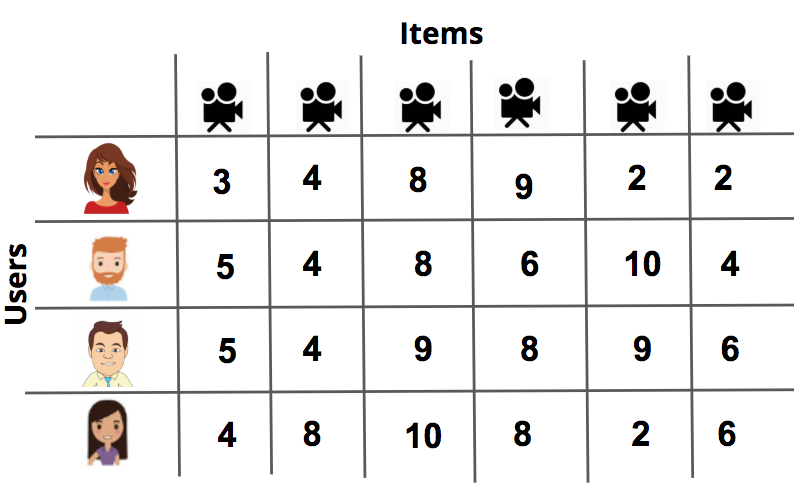

The real world:

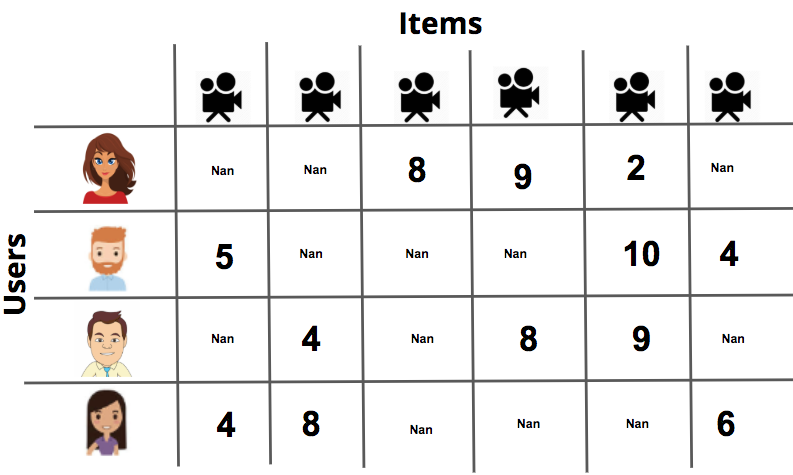

Therefore, if we keep all k latent features it is likely that latent features with smaller values in the sigma matrix will explain variability that is probably due to noise and not signal. Furthermore, if we use these "noisey" latent features to assist in re-constructing the original user-movie matrix it will potentially (and likely) lead to worse ratings than if we only have latent features associated with signal.   

`9.` Let's try introducing just a little of the real world into this example by performing SVD on a matrix with missing values.  Below I have added a new user to our matrix who hasn't rated all four of our movies.  Try performing SVD on the new matrix.  What happens?

In [43]:
# This line adds one nan value as the very first entry in our matrix
user_movie_subset.iloc[0, 0] = np.nan # no changes to this line

# Try svd with this new matrix
u, s, vt = np.linalg.svd(user_movie_subset)# Compute SVD on the new matrix with the single nan value

LinAlgError: SVD did not converge

## Singular Value Decomposition Takeaways
Three main takeaways from the previous notebook:

1. The latent factors retrieved from SVD aren't actually labeled.
2. We can get an idea of how many latent factors we might want to keep by using the Sigma matrix.
3. SVD in NumPy will not work when our matrix has missing values. **This makes this technique less than useful for our current user-movie matrix**.

## SVD Closed Form Solution
### What Is A Closed Form Solution?
A closed form solution is one where you can directly find the solution values (unlike iterative solutions, which are commonly used in practice). There isn't an iterative approach to solving a particular equation. One of the most popular examples of a closed form solution is the solution for multiple linear regression. That is if we want to find an estimate for \betaβ in the following situation:

$$y = X\beta$$

We can find it by computing the **Best Linear Unbiased Estimate (BLUE)**. It can be found **in closed form** using the equation:

$$\hat{\beta} = (X'X)^-X'y$$

where **X** is a matrix of explanatory inputs and y is a response vector.

Another common example of a closed form solution is the quadratic equation. If we want to find **x** that solves:

$$ax^2 + bx + c = 0$$

We can find these values using the quadratic formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

**Each of these is an example of a closed form solution, because in each case we have an equation that allows us to solve directly for our values of interest.**

### Closed Form Solutions for SVD
It turns out there is a closed form solution for Singular Value Decomposition that can be used to identify each of the matrices of interest $(U, \Sigma, VU,Σ,V)$. The most straightforward explanation of this closed form solution can be found at [this MIT link](http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm).

As put in the paper -

"Calculating the SVD consists of finding the eigenvalues and eigenvectors of $AA'$ and $A'A$. The eigenvectors of $A'A$ make up the columns of $V$, the eigenvectors of $AA'$ make up the columns of $U$. Also, the singular values in $\Sigma$ are square roots of eigenvalues from $AA'$ or $A'A$. The singular values are the diagonal entries of the \sigmaσ matrix and are arranged in descending order. The singular values are always real numbers. If the matrix $A$ is a real matrix, then $U$ and $V$ are also real."

Again, you can see a fully worked example of the closed form solution at the [MIT Link here](http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm).

### A More Common Approach
The main issue with the closed form solution (especially for us) is that it doesn't actually work when we have missing data. Instead, Simon Funk (and then many followers) came up with other solutions for finding our matrices of interest in these cases using **gradient descent**.

So all of this is to say, people don't really use the closed form solution for SVD, and therefore, we aren't going to spend a lot of time on it either. The link above is all you need to know. Now, we are going to look at the main way that the matrices in SVD are estimated, as this is what is used for estimating values in FunkSVD.

### Additional Resources
Below are some additional resources in case you are looking for others that go beyond what was shown in the simplified MIT paper.

[Stanford Discussion on SVD](http://infolab.stanford.edu/~ullman/mmds/ch11.pdf)

[Why are Singular Values Always Positive on StackExchange](https://math.stackexchange.com/questions/2060572/why-are-singular-values-always-non-negative)

[An additional resource for SVD in Python](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/)

[Using Missing Values to Improve Recommendations in SVD](https://www.hindawi.com/journals/mpe/2015/380472/)

### Implementing FunkSVD

In this notebook we will take a look at writing our own function that performs FunkSVD, which will follow the steps you saw in the previous video.  If you find that you aren't ready to tackle this task on your own, feel free to skip to the following video where you can watch as I walk through the steps.

To test our algorithm, we will run it on the subset of the data you worked with earlier.  Run the cell below to get started.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
#import svd_tests as t
%matplotlib inline

# Read in the datasets
movies = pd.read_csv('movies_clean1.csv')
reviews = pd.read_csv('reviews_clean1.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

# Create user-by-item matrix
user_items = reviews[['user_id', 'movie_id', 'rating', 'timestamp']]
user_by_movie = user_items.groupby(['user_id', 'movie_id'])['rating'].max().unstack()

# Create data subset
user_movie_subset = user_by_movie[[73486, 75314,  68646, 99685]].dropna(axis=0)
ratings_mat = np.matrix(user_movie_subset)
print(ratings_mat)

[[10. 10. 10. 10.]
 [10.  4.  9. 10.]
 [ 8.  9. 10.  5.]
 [ 9.  8. 10. 10.]
 [10.  5.  9.  9.]
 [ 6.  4. 10.  6.]
 [ 9.  8. 10.  9.]
 [10.  5.  9.  8.]
 [ 7.  8. 10.  8.]
 [ 9.  5.  9.  7.]
 [ 9.  8. 10.  8.]
 [ 9. 10. 10.  9.]
 [10.  9. 10.  8.]
 [ 5.  8.  5.  8.]
 [10.  8. 10. 10.]
 [ 9.  9. 10. 10.]
 [ 9.  8.  8.  8.]
 [10.  8.  1. 10.]
 [ 5.  6. 10. 10.]
 [ 8.  7. 10.  7.]]


`1.` You will use the **user_movie_subset** matrix to show that your FunkSVD algorithm will converge.  In the below cell, use the comments and document string to assist you as you complete writing your own function to complete FunkSVD.  You may also want to try to complete the function on your own without the assistance of comments.  You may feel free to remove and add to the function in any way that gets you a working solution! 

**Notice:** There isn't a sigma matrix in this version of the matrix factorization.

In [158]:
def FunkSVD(ratings_mat, latent_features=4, learning_rate=0.0001, iters=100):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization
    
    INPUT:
    ratings_mat - (numpy array) a matrix with users as rows, movies as columns, and ratings as values
    latent_features - (int) the number of latent features used
    learning_rate - (float) the learning rate 
    iters - (int) the number of iterations
    
    OUTPUT:
    user_mat - (numpy array) a user by latent feature matrix
    movie_mat - (numpy array) a latent feature by movie matrix
    '''
    ratings_mat = np.matrix(ratings_mat)
    # Set up useful values to be used through the rest of the function
    n_users = ratings_mat.shape[0] # number of rows in the matrix
    n_movies = ratings_mat.shape[1] # number of movies in the matrix
    num_ratings = np.count_nonzero(~np.isnan(ratings_mat)) # total number of ratings in the matrix
    
    # initialize the user and movie matrices with random values
    # helpful link: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html
    user_mat = np.random.rand(n_users,latent_features)# user matrix filled with random values of shape user x latent 
    movie_mat = np.random.rand(latent_features,n_movies)# movie matrix filled with random values of shape latent x movies
    
    # initialize sse at 0 for first iteration
    sse_accum = 0
    
    # header for running results
    print("Optimization Statistics")
    print("Iterations | Mean Squared Error ")
    
    # for each iteration
    for ite in range(iters):

        # update our sse
        old_sse = sse_accum
        sse_accum = 0
        
        # For each user-movie pair
        for i in range(n_users):
            for j in range(n_movies):
                
                # if the rating exists
                if not np.isnan(ratings_mat[i,:][:,j]):   
                    # compute the error as the actual minus the dot product of the user and movie latent features
                    error = ratings_mat[i,:][:,j] - user_mat[i,:].dot(movie_mat[:,j])
                    # Keep track of the total sum of squared errors for the matrix
                    sse_accum += error**2
                    # update the values in each matrix in the direction of the gradient
                    for a in range(latent_features):
                        user_mat[i][a] = user_mat[i][a] + 2 * learning_rate * error * movie_mat[a][j]
                        movie_mat[a][j] = movie_mat[a][j] + 2 * learning_rate * error * user_mat[i][a]
                        
        # print results for iteration
        print("%d \t\t %f" % (iteration+1, sse_accum / num_ratings))
        
    return user_mat, movie_mat 



In [159]:
user_mat, movie_mat = FunkSVD(user_movie_subset, latent_features=4, learning_rate=0.005, iters=10)
# use your function with 4 latent features, lr of 0.005 and 10 iterations

Optimization Statistics
Iterations | Mean Squared Error 
1 | 3616.5670054848774
2 | 1359.675586185464
3 | 393.94846525062616
4 | 244.59258784564716
5 | 222.81401125446556
6 | 216.5831935945321
7 | 213.45215013486802
8 | 210.96581112353172
9 | 208.50938535420502
10 | 205.89944699759835


In [160]:
#Compare the predicted and actual results
print(np.dot(user_mat, movie_mat))
print(ratings_mat)

[[ 9.83342484  9.01785045 10.5905187  10.05112816]
 [ 8.90644104  7.37960242  9.17638422  8.62109997]
 [ 7.79495075  6.99993895  8.14578814  7.83803954]
 [ 9.79457829  8.16181524  9.89603599  9.62098353]
 [ 8.6614619   7.38112789  8.89510674  8.57539458]
 [ 7.01165734  5.81889281  7.10733165  6.9426569 ]
 [ 9.42762923  7.74958324  9.68467062  9.22791312]
 [ 8.41982166  6.9171289   8.43680366  8.38237172]
 [ 8.07784776  8.01455558  8.96999121  8.33964337]
 [ 7.98244353  6.20065172  8.02151589  7.83320897]
 [ 8.79191629  7.81477189  9.39163112  8.82070619]
 [ 9.41387439  8.7006686  10.06573622  9.50498287]
 [ 9.14784812  8.10662794  9.77493762  9.2882065 ]
 [ 6.41618611  6.09265246  6.96364603  6.55715994]
 [ 9.95712064  8.40769508 10.08837679  9.81884842]
 [ 9.90469915  8.18371171 10.21145483  9.85103227]
 [ 8.18982981  7.44958557  8.65912128  8.28468898]
 [ 7.1971995   6.32864458  7.2656786   7.15112281]
 [ 8.28258221  7.41754456  8.77947201  8.37173638]
 [ 7.83805186  7.25585828  8.63

`3.` Let's try out the function again on the **user_movie_subset** dataset.  This time we will again use 4 latent features and a learning rate of 0.005.  However, let's bump up the number of iterations to 250.  When you take the dot product of the resulting U and V matrices, how does the resulting **user_movie** matrix compare to the original subset of the data?  What do you notice about your error at the end of the 250 iterations?

In [161]:
user_mat, movie_mat = FunkSVD(user_movie_subset, latent_features=4, learning_rate=0.005, iters=250)

#use your function with 4 latent features, lr of 0.005 and 250 iterations

Optimization Statistics
Iterations | Mean Squared Error 
1 | 3281.332749974316
2 | 1169.017688144287
3 | 351.661695737713
4 | 233.39265163613092
5 | 219.10552477938725
6 | 215.5761393257425
7 | 213.46954509516388
8 | 211.4042836881327
9 | 209.07284629262455
10 | 206.36598975841946
11 | 203.21673481403312
12 | 199.57125928257324
13 | 195.38658321922432
14 | 190.63505097118718
15 | 185.31098993422918
16 | 179.43778627143783
17 | 173.07383446279385
18 | 166.31556513887534
19 | 159.29571954866267
20 | 152.17557394199866
21 | 145.13105487054412
22 | 138.33442291868346
23 | 131.93485848543992
24 | 126.04210031165414
25 | 120.71673887712018
26 | 115.9689387314063
27 | 111.76499074553621
28 | 108.03916411379338
29 | 104.70752076557734
30 | 101.68073320755123
31 | 98.87405608811234
32 | 96.21383398637866
33 | 93.6408469200844
34 | 91.11125316066844
35 | 88.59596003648738
36 | 86.0791013274648
37 | 83.55607641424821
38 | 81.03140790158554
39 | 78.5165417430521
40 | 76.02764977514796
41 | 73.5834

In [162]:
#Compare the predicted and actual results
print(np.dot(user_mat, movie_mat))
print(ratings_mat)

[[12.13382099  9.99999882  9.99999913 10.00000156]
 [10.00000893  4.0000019   9.00000176  9.99999258]
 [ 8.00001699  9.00000372 10.00000339  4.99998571]
 [ 8.99999062  7.99999807  9.99999811 10.00000744]
 [10.00000815  5.00000161  9.00000149  8.99999316]
 [ 6.00002382  4.00000453 10.00000429  5.9999804 ]
 [ 8.99999027  7.99999778  9.99999785  9.0000077 ]
 [ 9.99998465  4.99999681  8.99999692  8.00001231]
 [ 7.00000126  8.00000038 10.00000026  7.99999868]
 [ 9.00002355  5.00000465  9.00000435  6.99998051]
 [ 9.00001625  8.00000299 10.00000277  7.99998639]
 [ 9.00001915 10.00000338 10.00000315  8.99998397]
 [ 9.99998342  8.99999606  9.99999622  8.00001313]
 [ 5.00001124  8.00000207  5.00000192  7.99999061]
 [ 9.99998112  7.99999578  9.99999597 10.00001511]
 [ 8.99999092  8.99999808  9.99999812 10.00000709]
 [ 9.00001394  8.00000288  8.00000264  7.99998823]
 [10.00000509  8.00000122  1.00000109  9.99999556]
 [ 5.00000321  6.00000034 10.0000003   9.99999722]
 [ 7.99996379  6.9999927   9.99

The last time we placed an **np.nan** value into this matrix the entire svd algorithm in python broke.  Let's see if that is still the case using your FunkSVD function.  In the below cell, I have placed a nan into the first cell of your numpy array.  

`4.` Use 4 latent features, a learning rate of 0.005, and 250 iterations.  Are you able to run your SVD without it breaking (something that was not true about the python built in)?  Do you get a prediction for the nan value?  What is your prediction for the missing value? Use the cells below to answer these questions.

In [163]:
# Here we are placing a nan into our original subset matrix
user_movie_subset.iloc[0, 0] = np.nan
user_movie_subset

movie_id,73486,75314,68646,99685
user_id,,,,
265,NaN,10.0,10.0,10.0
1023,10.0,4.0,9.0,10.0
1683,8.0,9.0,10.0,5.0
6571,9.0,8.0,10.0,10.0
11639,10.0,5.0,9.0,9.0
13006,6.0,4.0,10.0,6.0
14076,9.0,8.0,10.0,9.0
14725,10.0,5.0,9.0,8.0
23548,7.0,8.0,10.0,8.0


In [165]:
user_mat, movie_mat = FunkSVD(user_movie_subset, latent_features=4, learning_rate=0.005, iters=250)

#use your function with 4 latent features, lr of 0.005 and 250 iterations

Optimization Statistics
Iterations | Mean Squared Error 
1 | 3694.0939587192
2 | 1474.2546598287577
3 | 422.8957460123212
4 | 241.7477671744943
5 | 214.98420666544553
6 | 206.4762754164999
7 | 201.1564602307365
8 | 196.3507616249718
9 | 191.37223068570174
10 | 186.00234097636596
11 | 180.16022853662164
12 | 173.82256144836865
13 | 167.00460895664017
14 | 159.75663830271108
15 | 152.16281791756282
16 | 144.33819500236504
17 | 136.42200106986104
18 | 128.567029822341
19 | 120.9261187629059
20 | 113.63782417093789
21 | 106.81389090583623
22 | 100.5308389580311
23 | 94.82696969253442
24 | 89.70471454441261
25 | 85.13703238015702
26 | 81.07591228647667
27 | 77.4610619085144
28 | 74.22737843658211
29 | 71.31050055454143
30 | 68.65035613804791
31 | 66.19301446986505
32 | 63.891313624483885
33 | 61.70472765883835
34 | 59.598845366060004
35 | 57.54471629348438
36 | 55.51821685083455
37 | 53.499513166253486
38 | 51.472647653550894
39 | 49.42524694625493
40 | 47.348332921026504
41 | 45.2362103223

In [166]:
# Run this cell to see if you were able to predict for the missing value
preds = np.dot(user_mat, movie_mat)
print("The predicted value for the missing rating is {}:".format(preds[0,0]))
print()
print("The actual value for the missing rating is {}:".format(ratings_mat[0,0]))
print()
assert np.isnan(preds[0,0]) == False
print("That's right! You just predicted a rating for a user-movie pair that was never rated!")
print("But if you look in the original matrix, this was actually a value of 10. Not bad!")

The predicted value for the missing rating is 9.603669749983446:

The actual value for the missing rating is 10.0:

That's right! You just predicted a rating for a user-movie pair that was never rated!
But if you look in the original matrix, this was actually a value of 10. Not bad!


Now let's extend this to a more realistic example. Unfortunately, running this function on your entire user-movie matrix is still not something you likely want to do on your local machine.  However, we can see how well this example extends to 1000 users.  In the above portion, you were using a very small subset of data with no missing values.

`5.` Given the size of this matrix, this will take quite a bit of time.  Consider the following hyperparameters: 4 latent features, 0.005 learning rate, and 20 iterations.  Grab a snack, take a walk, and this should be done running in a bit.

In [167]:
# Setting up a matrix of the first 1000 users with movie ratings
first_1000_users = user_by_movie.head(1000)

# perform funkSVD on the matrix of the top 1000 users
user_mat, movie_mat = FunkSVD(first_1000_users, latent_features=4, learning_rate=0.005, iters=20)

#fit to 1000 users with 4 latent features, lr of 0.005, and 20 iterations

Optimization Statistics
Iterations | Mean Squared Error 
1 | 254391.93916249604
2 | 117089.09097521224
3 | 80274.04330237593
4 | 61843.752778268026
5 | 50242.09988989607
6 | 42128.23622703942
7 | 36095.19980744123
8 | 31426.67847159456
9 | 27710.610529342426
10 | 24690.39652105649
11 | 22197.580050546992
12 | 20116.83041578346
13 | 18365.715750751504
14 | 16882.560492542536
15 | 15619.284285753962
16 | 14537.318428798297
17 | 13605.26810537227
18 | 12797.455569148455
19 | 12092.875386634229
20 | 11474.358896638261


`6.` Now that you have a set of predictions for each user-movie pair,  let's answer a few questions about your results. Provide the correct values for each of the variables below, and check your solutions using the tests below.

In [168]:
# How many actual ratings exist in first_1000_users
num_ratings = np.count_nonzero(~np.isnan(first_1000_users))
print("The number of actual ratings in the first_1000_users is {}.".format(num_ratings))
print()

# How many ratings did we make for user-movie pairs that didn't have ratings
ratings_for_missing = first_1000_users.shape[0]*first_1000_users.shape[1] - num_ratings
print("The number of ratings made for user-movie pairs that didn't have ratings is {}".format(ratings_for_missing))

The number of actual ratings in the first_1000_users is 10852.

The number of ratings made for user-movie pairs that didn't have ratings is 31234148


In [169]:
# Test your results against the solution
assert num_ratings == 10852, "Oops!  The number of actual ratings doesn't quite look right."
assert ratings_for_missing == 31234148, "Oops!  The number of movie-user pairs that you made ratings for that didn't actually have ratings doesn't look right."

# Make sure you made predictions on all the missing user-movie pairs
preds = np.dot(user_mat, movie_mat)
assert np.isnan(preds).sum() == 0
print("Nice job!  Looks like you have predictions made for all the missing user-movie pairs! But I still have one question... How good are they?")

Nice job!  Looks like you have predictions made for all the missing user-movie pairs! But I still have one question... How good are they?


### How Are We Doing?

In the last notebook, you created a working version of SVD for situations even when there are tons of missing values.  This is awesome!  The question now is how well does this solution work?

In this notebook, we are going to simulate exactly what we would do in the real world to tune our recommender.  

Run the cell below to read in the data and get started.

In [1]:
import numpy as np
import pandas as pd

# Read in the datasets
movies = pd.read_csv('movies_clean1.csv')
reviews = pd.read_csv('reviews_clean1.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

1. Using the **reviews** dataframe, perform the following tasks to create a training and validation set of data we can use to test the performance of your SVD algorithm using **off-line** validation techniques.

 * Order the reviews dataframe from earliest to most recent 
 * Pull the first 10000 reviews from  the dataset
 * Make the first 8000/10000 reviews the training data 
 * Make the last 2000/10000 the test data
 * Return the training and test datasets

In [2]:
def create_train_test(reviews, order_by, training_size, testing_size):
    '''    
    INPUT:
    reviews - (pandas df) dataframe to split into train and test
    order_by - (string) column name to sort by
    training_size - (int) number of rows in training set
    testing_size - (int) number of columns in the test set
    
    OUTPUT:
    training_df -  (pandas df) dataframe of the training set
    validation_df - (pandas df) dataframe of the test set
    '''
    sub_df = reviews.sort_values(by = order_by).iloc[:(training_size + testing_size)]
    training_df = sub_df.iloc[:training_size]
    validation_df = sub_df.iloc[training_size : (training_size + testing_size)]
    
    return training_df, validation_df

In [3]:
# Nothing to change in this or the next cell
# Use our function to create training and test datasets
train_df, val_df = create_train_test(reviews, 'date', 8000, 2000)

In [4]:
val_df.tail(1)

,user_id,movie_id,rating,timestamp,date,month_1,month_2,month_3,month_4,month_5,...,month_9,month_10,month_11,month_12,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
389430,29381,1258972,6,1363584678,2013-03-18 05:31:18,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# Make sure the dataframes we are using are the right shape
assert train_df.shape[0] == 8000, "The number of rows doesn't look right in the training dataset."
assert val_df.shape[0] == 2000, "The number of rows doesn't look right in the validation dataset"
assert str(train_df.tail(1)['date']).split()[1] == '2013-03-15', "The last date in the training dataset doesn't look like what we expected."
assert str(val_df.tail(1)['date']).split()[1] == '2013-03-18', "The last date in the validation dataset doesn't look like what we expected."
print("Nice job!  Looks like you have written a function that provides training and validation dataframes for you to use in the next steps.")

Nice job!  Looks like you have written a function that provides training and validation dataframes for you to use in the next steps.


In the real world, we might have all of the data up to this final date in the training data.  Then we want to see how well we are doing for each of the new ratings, which show up in the test data.

Below is a working example of the function created in the previous example you can use (or you can replace with your own).

`2.`  Fit the function to the training data with the following hyperparameters: 15 latent features, a learning rate of 0.005, and 250 iterations. This will take some time to run, so you may choose fewer latent features, a higher learning rate, or fewer iteratios if you want to speed up the process.  

**Note:** Again, this might be a good time to take a phone call, go for a walk, or just take a little break.  No need to change the code below unless you would like to make changes to reduce the time needed to obtain results.

In [11]:
def FunkSVD(ratings_mat, latent_features=12, learning_rate=0.0001, iters=100):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization
    
    INPUT:
    ratings_mat - (numpy array) a matrix with users as rows, movies as columns, and ratings as values
    latent_features - (int) the number of latent features used
    learning_rate - (float) the learning rate 
    iters - (int) the number of iterations
    
    OUTPUT:
    user_mat - (numpy array) a user by latent feature matrix
    movie_mat - (numpy array) a latent feature by movie matrix
    '''
    
    # Set up useful values to be used through the rest of the function
    n_users = ratings_mat.shape[0]
    n_movies = ratings_mat.shape[1]
    num_ratings = np.count_nonzero(~np.isnan(ratings_mat))
    
    # initialize the user and movie matrices with random values
    user_mat = np.random.rand(n_users, latent_features)
    movie_mat = np.random.rand(latent_features, n_movies)
    
    # initialize sse at 0 for first iteration
    sse_accum = 0
    
    # keep track of iteration and MSE
    print("Optimizaiton Statistics")
    print("Iterations | Mean Squared Error ")
    
    # for each iteration
    for iteration in range(iters):

        # update our sse
        old_sse = sse_accum
        sse_accum = 0
        
        # For each user-movie pair
        for i in range(n_users):
            for j in range(n_movies):
                
                # if the rating exists
                if ratings_mat[i, j] > 0:
                    
                    # compute the error as the actual minus the dot product of the user and movie latent features
                    diff = ratings_mat[i, j] - np.dot(user_mat[i, :], movie_mat[:, j])

                    # Keep track of the sum of squared errors for the matrix
                    sse_accum += diff**2
                    
                    # update the values in each matrix in the direction of the gradient
                    for k in range(latent_features):
                        user_mat[i, k] += learning_rate * (2*diff*movie_mat[k, j])
                        movie_mat[k, j] += learning_rate * (2*diff*user_mat[i, k])

        # print results
        print("%d \t\t %f" % (iteration+1, sse_accum / num_ratings))
        
    return user_mat, movie_mat 

In [12]:
# Create user-by-item matrix - nothing to do here
train_user_item = train_df[['user_id', 'movie_id', 'rating', 'timestamp']]
train_data_df = train_user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
train_data_np = np.array(train_data_df)

# Fit FunkSVD with the specified hyper parameters to the training data
user_mat, movie_mat = FunkSVD(train_data_np, latent_features=15, learning_rate=0.005, iters=250)


Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 10.499388
2 		 5.872401
3 		 4.099314
4 		 3.070942
5 		 2.395211
6 		 1.916533
7 		 1.560939
8 		 1.288384
9 		 1.074846
10 		 0.904754
11 		 0.767454
12 		 0.655374
13 		 0.562986
14 		 0.486172
15 		 0.421813
16 		 0.367512
17 		 0.321408
18 		 0.282041
19 		 0.248257
20 		 0.219134
21 		 0.193929
22 		 0.172037
23 		 0.152964
24 		 0.136298
25 		 0.121698
26 		 0.108876
27 		 0.097590
28 		 0.087634
29 		 0.078832
30 		 0.071036
31 		 0.064115
32 		 0.057961
33 		 0.052478
34 		 0.047583
35 		 0.043205
36 		 0.039284
37 		 0.035765
38 		 0.032603
39 		 0.029755
40 		 0.027188
41 		 0.024869
42 		 0.022773
43 		 0.020874
44 		 0.019153
45 		 0.017590
46 		 0.016169
47 		 0.014877
48 		 0.013699
49 		 0.012624
50 		 0.011644
51 		 0.010747
52 		 0.009928
53 		 0.009177
54 		 0.008489
55 		 0.007858
56 		 0.007279
57 		 0.006747
58 		 0.006258
59 		 0.005807
60 		 0.005393
61 		 0.005011
62 		 0.004659
63 		 0.004334
64 		 

Now that you have created the **user_mat** and **movie_mat**, we can use this to make predictions for how users would rate movies, by just computing the dot product of the row associated with a user and the column associated with the movie.

`3.` Use the comments in the function below to complete the **predict_rating** function.

In [15]:
def predict_rating(user_matrix, movie_matrix, user_id, movie_id):
    '''
    INPUT:
    user_matrix - user by latent factor matrix
    movie_matrix - latent factor by movie matrix
    user_id - the user_id from the reviews df
    movie_id - the movie_id according the movies df
    
    OUTPUT:
    pred - the predicted rating for user_id-movie_id according to FunkSVD
    '''
    # Use the training data to create a series of users and movies that matches the ordering in training data
    train_user = train_data_df.index.values
    train_movies = train_data_df.columns.values
    
    # User row and Movie Column
    row = np.where(train_user == user_id)[0]
    col = np.where(train_movies == movie_id)[0]
    
    # Take dot product of that row and column in U and V to make prediction
    pred = np.dot(user_matrix[row,:],movie_matrix[:,col])[0][0]


    return pred


In [16]:
# Test your function with the first user-movie in the user-movie matrix (notice this is a nan)
pred_val = predict_rating(user_mat, movie_mat, 8, 2844)
pred_val

5.573996067425098

It is great that you now have a way to make predictions. However it might be nice to get a little phrase back about the user, movie, and rating.

`4.` Use the comments in the function below to complete the **predict_rating** function.  

**Note:** The movie name doesn't come back in a great format, so you can see in the solution I messed around with it a bit just to make it a little nicer.

In [17]:
def print_prediction_summary(user_id, movie_id, prediction):
    '''
    INPUT:
    user_id - the user_id from the reviews df
    movie_id - the movie_id according the movies df
    prediction - the predicted rating for user_id-movie_id
    
    OUTPUT:
    None - prints a statement about the user, movie, and prediction made
    
    '''
    movie_name = movies[movies['movie_id'] == movie_id]['movie'].values[0]
    
    print('user:{} \t movie:{} \t prediction:{:.2f}'.format(user_id,movie_name,prediction))


In [18]:
# Test your function the the results of the previous function
print_prediction_summary(8, 2844, pred_val)

user:8 	 movie:Fantômas - À l'ombre de la guillotine (1913) 	 prediction:5.57


Now that we have the ability to make predictions, let's see how well our predictions do on the test ratings we already have.  This will give an indication of how well we have captured the latent features, and our ability to use the latent features to make predictions in the future!

`5.` For each of the user-movie rating in the **val_df** dataset, compare the actual rating given to the prediction you would make.  How do your predictions do?  Do you run into any problems?  If yes, what is the problem?  Use the document strings and comments below to assist as you work through these questions.

In [19]:
val_df['movie_id'].iloc[0]

1598822

In [20]:
def validation_comparison(val_df, num_preds):
    '''
    INPUT:
    val_df - the validation dataset created in the third cell above
    num_preds - (int) the number of rows (going in order) you would like to make predictions for
    
    OUTPUT:
    Nothing returned - print a statement about the prediciton made for each row of val_df from row 0 to num_preds
    '''
    for i in range(num_preds):
        user_id = val_df['user_id'].iloc[i]
        movie_id= val_df['movie_id'].iloc[i]
        val_ratings = val_df['rating'].iloc[i]
        movie_name = movies[movies['movie_id'] == movie_id]['movie'].values[0]
        pred = predict_rating(user_mat, movie_mat, user_id, movie_id)
        print('user:{}\t original rating:{}\t prediction:{:.2f}\t movie:{}'.format(user_id,val_ratings,pred,movie_id))

        
# Perform the predicted vs. actual for the first 6 rows.  How does it look?
validation_comparison(val_df, 6)        

user:49056	 original rating:8	 prediction:7.85	 movie:1598822
user:49056	 original rating:9	 prediction:9.24	 movie:289879
user:49056	 original rating:9	 prediction:7.88	 movie:1563738
user:49056	 original rating:4	 prediction:7.73	 movie:1458175
user:28599	 original rating:8	 prediction:7.11	 movie:103639
user:50593	 original rating:4	 prediction:2.78	 movie:1560985


In [21]:
# Perform the predicted vs. actual for the first 7 rows.  What happened?
validation_comparison(val_df, 7)        

user:49056	 original rating:8	 prediction:7.85	 movie:1598822
user:49056	 original rating:9	 prediction:9.24	 movie:289879
user:49056	 original rating:9	 prediction:7.88	 movie:1563738
user:49056	 original rating:4	 prediction:7.73	 movie:1458175
user:28599	 original rating:8	 prediction:7.11	 movie:103639
user:50593	 original rating:4	 prediction:2.78	 movie:1560985


IndexError: index 0 is out of bounds for axis 0 with size 0

In [253]:
train_df[train_df['movie_id'] == 287978]

,user_id,movie_id,rating,timestamp,date,month_1,month_2,month_3,month_4,month_5,...,month_9,month_10,month_11,month_12,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018


## The Cold Start Problem
The **cold start problem** is the problem that new users and new items to a platform don't have any ratings. Because these users and items don't have any ratings, it is impossible to use collaborative filtering methods to make recommendations.

Therefore, methods you used in the previous lesson like (rank-based and content-based recommenders) are the only way to get started with making recommendations for these individuals.

### Cold Start Problem

In the previous notebook, you learned about the **Cold Start Problem** first hand. In cases where you are introduced to a new user or new movie, collaborative flitering is not helpful as a technique to make predictions.

Instead, you will need to use one of the techniques from the previous lesson like content based recommendations for new items or rank based recommendations for new users.  

As a final step to completing out our recommendation system, we will build in these edge cases. Run the cell below to get started.

### Matrix Factorization - Collaborative Filtering Where Possible

Notice the following information is available by running the below cell:

`1.` **reviews** - a dataframe of reviews

`2.` **movies** - a dataframe of movies

`3.` **create_train_test** - a function for creating the training and validation datasets

`4.` **predict_rating** - a function that takes a user and movie and gives a prediction using FunkSVD

`5.` **train_df** and **val_df** - the training and test datasets used in the previous notebook

`6.` **user_mat** and **movie_mat** - the u and v matrices from FunkSVD

`7.` **train_data_df** - a user-movie matrix with ratings where available.  FunkSVD was performed on this matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

# Read in the datasets
movies = pd.read_csv('movies_clean1.csv')
reviews = pd.read_csv('reviews_clean1.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

def create_train_test(reviews, order_by, training_size, testing_size):
    '''    
    INPUT:
    reviews - (pandas df) dataframe to split into train and test
    order_by - (string) column name to sort by
    training_size - (int) number of rows in training set
    testing_size - (int) number of columns in the test set
    
    OUTPUT:
    training_df -  (pandas df) dataframe of the training set
    validation_df - (pandas df) dataframe of the test set
    '''
    reviews_new = reviews.sort_values(order_by)
    training_df = reviews_new.head(training_size)
    validation_df = reviews_new.iloc[training_size:training_size+testing_size]
    
    return training_df, validation_df

def predict_rating(user_matrix, movie_matrix, user_id, movie_id):
    '''
    INPUT:
    user_matrix - user by latent factor matrix
    movie_matrix - latent factor by movie matrix
    user_id - the user_id from the reviews df
    movie_id - the movie_id according the movies df
    
    OUTPUT:
    pred - the predicted rating for user_id-movie_id according to FunkSVD
    '''
    # Create series of users and movies in the right order
    user_ids_series = np.array(train_data_df.index)
    movie_ids_series = np.array(train_data_df.columns)
    
    # User row and Movie Column
    user_row = np.where(user_ids_series == user_id)[0][0]
    movie_col = np.where(movie_ids_series == movie_id)[0][0]
    
    # Take dot product of that row and column in U and V to make prediction
    pred = np.dot(user_matrix[user_row, :], movie_matrix[:, movie_col])
    
    return pred

# Use our function to create training and test datasets
train_df, val_df = create_train_test(reviews, 'date', 8000, 2000)

# Create user-by-item matrix - this will keep track of order of users and movies in u and v
train_user_item = train_df[['user_id', 'movie_id', 'rating', 'timestamp']]
train_data_df = train_user_item.groupby(['user_id', 'movie_id'])['rating'].max().unstack()
train_data_np = np.array(train_data_df)

# Read in user and movie matrices
user_file = open("user_matrix", 'rb')
user_mat = pickle.load(user_file)
user_file.close()

movie_file = open("movie_matrix", 'rb')
movie_mat = pickle.load(movie_file)
movie_file.close()

In [6]:
movie_mat.shape

(15, 2679)

### Validating Predictions

Unfortunately, you weren't able to make predictions on every user-movie combination in the test set, as some of these users or movies were new.  

However, you can validate your predictions for the user-movie pairs that do exist in the user_mat and movie_mat matrices.  

`1.` Complete the function below to see how far off we were on average across all of the predicted ratings.

In [7]:
val_df.head()

,user_id,movie_id,rating,timestamp,date,month_1,month_2,month_3,month_4,month_5,...,month_9,month_10,month_11,month_12,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
650588,49056,1598822,8,1363308721,2013-03-15 00:52:01,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
650569,49056,289879,9,1363308742,2013-03-15 00:52:22,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
650585,49056,1563738,9,1363308780,2013-03-15 00:53:00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
650583,49056,1458175,4,1363308799,2013-03-15 00:53:19,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
378686,28599,103639,8,1363309112,2013-03-15 00:58:32,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
val_df.iloc[0]['user_id']

49056

In [13]:
if np.isin(val_df.iloc[0]['user_id'],(np.array(train_data_df.index))):
    print(1)

1


In [20]:
def validation_comparison(val_df, user_mat=user_mat, movie_mat=movie_mat):
    '''
    INPUT:
    val_df - the validation dataset created in the third cell above
    user_mat - U matrix in FunkSVD
    movie_mat - V matrix in FunkSVD
        
    OUTPUT:
    rmse - RMSE of how far off each value is from it's predicted value
    perc_rated - percent of predictions out of all possible that could be rated
    actual_v_pred - a 10 x 10 grid with counts for actual vs predicted values
    preds - (list) predictions for any user-movie pairs where it was possible to make a prediction
    acts - (list) actual values for any user-movie pairs where it was possible to make a prediction
    '''
    count = 0
    sse = 0
    perc_rated = 0
    preds = []
    acts= []
    actual_v_pred = np.zeros((10,10))
    
    for i in range(val_df.shape[0]):
        try:            
            pred = predict_rating(user_mat, movie_mat, val_df.iloc[i]['user_id'], val_df.iloc[i]['movie_id'])
            count += 1
            error = val_df.iloc[i]['rating'] - pred
            sse += error **2
            preds.append(pred)
            acts.append(val_df.iloc[i]['rating'])
            actual_v_pred[11-int(val_df.iloc[i]['rating']-1), int(round(pred)-1)]+=1
            
        except:
            continue
            
    rmse = np.sqrt(sse / count)
    perc_rated = count / val_df.shape[0]
    

    return rmse, perc_rated, actual_v_pred, preds, acts


2.04861637989704 0.4795


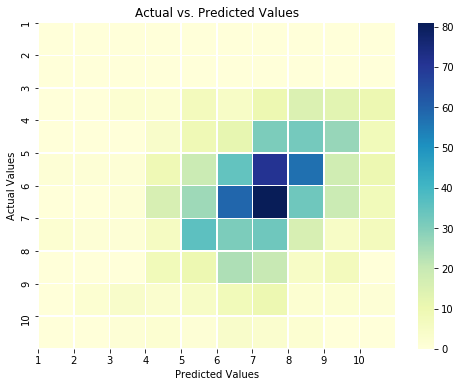

In [32]:
# How well did we do?
rmse, perc_rated, actual_v_pred, preds, acts = validation_comparison(val_df)
print(rmse, perc_rated)
plt.figure(figsize=(8,6))
sns.heatmap(actual_v_pred,linewidths=.5,cmap="YlGnBu");
plt.xticks(np.arange(10), np.arange(1,11));
plt.yticks(np.arange(10), np.arange(1,11));
plt.xlabel("Predicted Values");
plt.ylabel("Actual Values");
plt.title("Actual vs. Predicted Values");

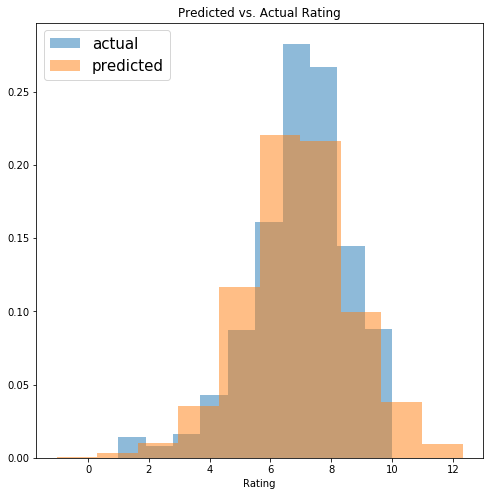

In [27]:
plt.figure(figsize=(8,8))
plt.hist(acts, density=True, alpha=.5, label='actual');
plt.hist(preds, density=True, alpha=.5, label='predicted');
plt.legend(loc=2, prop={'size': 15});
plt.xlabel('Rating');
plt.title('Predicted vs. Actual Rating');

`2.` We didn't do so bad on making those predictions!  But, how many user-movie pairs were we unable to make predictions for?  Use the cell below to answer this question.

In [33]:
val_df.shape[0] * (1 - perc_rated)

1041.0

### Content Based For New Movies

If all of the above went well, you will notice we still have work to do!  We need to bring in a few things we picked up from the last lesson to use for those new users and movies.  Below is the code used to make the content based recommendations, which found movies that were similar to one another.  This was from **5_Content_Based_Recommendations** in the previous lesson.

The below function **find_similar_movies** will provide similar movies to any movie based only on content.  

Run the cell below to gain access to the content based similarity functions.

In [37]:
movie_idx = np.where(movies['movie_id'] == 8)[0][0]
movie_idx

0

In [38]:
similar_idxs = np.where(dot_prod_movies[movie_idx] == np.max(dot_prod_movies[movie_idx]))[0]
similar_idxs

array([    0,     1,     2,  9584, 12766, 21723])

In [40]:
similar_movies = np.array(movies.iloc[similar_idxs, ]['movie'])
similar_movies

array(['Edison Kinetoscopic Record of a Sneeze (1894)',
       'La sortie des usines Lumière (1895)',
       'The Arrival of a Train (1896)',
       'Annabelle Serpentine Dance (1895)',
       'Roundhay Garden Scene (1888)',
       'Llandudno Happy Valley and Minstrel Show (1898)'], dtype=object)

In [44]:
movie_lst = list(movies[movies['movie_id'].isin([    0,     1,     2,  9584, 12766, 21723])]['movie'])
movie_lst

[]

In [36]:
dot_prod_movies

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 2, 1],
       [0, 0, 0, ..., 2, 2, 1],
       [0, 0, 0, ..., 1, 1, 2]])

In [78]:
# Subset so movie_content is only using the dummy variables for each genre and the 3 century based year dummy columns
movie_content = np.array(movies.iloc[:,4:])

# Take the dot product to obtain a movie x movie matrix of similarities
dot_prod_movies = movie_content.dot(np.transpose(movie_content))


def find_similar_movies(movie_id):
    '''
    INPUT
    movie_id - a movie_id 
    OUTPUT
    similar_movies - an array of the most similar movies by title
    '''
    # find the row of each movie id
    movie_idx = np.where(movies['movie_id'] == movie_id)[0][0]
    
    # find the most similar movie indices - to start I said they need to be the same for all content
    similar_idxs = np.where(dot_prod_movies[movie_idx] == np.max(dot_prod_movies[movie_idx]))[0]
    
    # pull the movie titles based on the indices
    similar_movies = np.array(movies.iloc[similar_idxs, ]['movie'])
    
    return similar_movies
    
    
def get_movie_names(movie_ids):
    '''
    INPUT
    movie_ids - a list of movie_ids
    OUTPUT
    movies - a list of movie names associated with the movie_ids
    
    '''
    movie_lst = list(movies[movies['movie_id'].isin(movie_ids)]['movie'])
   
    return movie_lst

### Rank Based For New Users

From the above two code cells, we have a way to make recommendations for movie-user pairs that have ratings in any part of our user-movie matrix.  We also have a way to make ratings for movies that have never received a rating using movie similarities.

In this last part here, we need a way to make recommendations to new users.  For this, our functions from **2_Most_Popular_Recommendations** in Lesson 1 will come in handy.  Run the cell below to have these functions available.

Run the cell below to gain access to the rank based functions.

In [61]:
def create_ranked_df(movies, reviews):
    '''
    INPUT
    movies - the movies dataframe
    reviews - the reviews dataframe
        
    OUTPUT
    ranked_movies - a dataframe with movies that are sorted by highest avg rating, more reviews, 
                        then time, and must have more than 4 ratings
    '''
        
        # Pull the average ratings and number of ratings for each movie
    movie_ratings = reviews.groupby('movie_id')['rating']
    avg_ratings = movie_ratings.mean()
    num_ratings = movie_ratings.count()
    last_rating = pd.DataFrame(reviews.groupby('movie_id').max()['date'])
    last_rating.columns = ['last_rating']

        # Add Dates
    rating_count_df = pd.DataFrame({'avg_rating': avg_ratings, 'num_ratings': num_ratings})
    rating_count_df = rating_count_df.join(last_rating)

        # merge with the movies dataset
    movie_recs = movies.set_index('movie_id').join(rating_count_df)

        # sort by top avg rating and number of ratings
    ranked_movies = movie_recs.sort_values(['avg_rating', 'num_ratings', 'last_rating'], ascending=False)

        # for edge cases - subset the movie list to those with only 5 or more reviews
    ranked_movies = ranked_movies[ranked_movies['num_ratings'] > 4]
        
    return ranked_movies
    

def popular_recommendations(user_id, n_top, ranked_movies):
    '''
    INPUT:
    user_id - the user_id (str) of the individual you are making recommendations for
    n_top - an integer of the number recommendations you want back
    ranked_movies - a pandas dataframe of the already ranked movies based on avg rating, count, and time

    OUTPUT:
    top_movies - a list of the n_top recommended movies by movie title in order best to worst
    '''

    top_movies = list(ranked_movies['movie'][:n_top])

    return top_movies


### Now For Your Task

The above cells set up everything we need to use to make predictions.  Your task is to write a function, which uses the above information as necessary to provide recommendations for every user in the **val_df** dataframe.  There isn't one right way to do this, but using a blend between the three could be your best bet.  

You can see the blended approach I used in the video on the next page, but feel free to be creative with your solution!

`3.` Use the function below along with the document strings to assist with completing the task for this notebook.  

In [72]:
val_users = train_data_df.index
val_users

Int64Index([    8,    46,    48,    51,    66,    72,    90,   104,   112,
              130,
            ...
            53744, 53793, 53795, 53805, 53838, 53856, 53932, 53943, 53962,
            53966],
           dtype='int64', name='user_id', length=3278)

In [101]:
val_users = train_data_df.index

idx = np.where(val_users == 46) 
preds = np.dot(user_mat[idx,:],movie_mat)
indies = preds.argsort()[0][0]

indies = indies[::-1][:5]

indies
#[:5][0][0]

#rec_ids = train_data_df.columns[indies]

#rec_ids

array([ 344,  537, 1343, 2431, 2621])

In [91]:
movie_lst = list(movies[movies['movie_id'].isin(rec_ids)]['movie'])
movie_lst

["Fantômas - À l'ombre de la guillotine (1913)",
 'The Immigrant (1917)',
 'Nanook of the North (1922)',
 'The Hunchback of Notre Dame (1923)',
 'Three Ages (1923)',
 "Entr'acte (1924)",
 'The Navigator (1924)',
 'Sherlock Jr. (1924)',
 'The Thief of Bagdad (1924)',
 'The General (1926)',
 'The Circus (1928)',
 'The Broadway Melody (1929)',
 'Chelovek s kino-apparatom (1929)',
 'Un chien andalou (1929)',
 'All Quiet on the Western Front (1930)',
 'Free and Easy (1930)',
 'Cimarron (1931)',
 'Frankenstein (1931)',
 'Grand Hotel (1932)',
 'Cavalcade (1933)',
 'Duck Soup (1933)',
 'Man of Aran (1934)',
 'Of Human Bondage (1934)',
 'The Thin Man (1934)',
 'Mutiny on the Bounty (1935)',
 'The Great Ziegfeld (1936)',
 'Modern Times (1936)',
 'Snow White and the Seven Dwarfs (1937)',
 'The Bad Man of Brimstone (1937)',
 'Dodge City (1939)',
 'Gone with the Wind (1939)',
 'Goodbye, Mr. Chips (1939)',
 'Of Mice and Men (1939)',
 'The Wizard of Oz (1939)',
 'All This, and Heaven Too (1940)',
 'T

In [85]:
indies

array([[[1628, 2605,  243, ..., 1343,  537,  344]]])

In [102]:
def make_recommendations(_id, _id_type='movie', train_data=train_data_df, 
                         train_df=train_df, movies=movies, rec_num=5, user_mat=user_mat,
                         movie_mat = movie_mat):
    '''
    INPUT:
    _id - either a user or movie id (int)
    _id_type - "movie" or "user" (str)
    train_data - dataframe of data as user-movie matrix
    train_df - dataframe of training data reviews
    movies - movies df
    rec_num - number of recommendations to return (int)
    user_mat - the U matrix of matrix factorization
    movie_mat - the V matrix of matrix factorization
    
    OUTPUT:
    rec_ids - (array) a list or numpy array of recommended movies by id                  
    rec_names - (array) a list or numpy array of recommended movies by name
    '''
    # if the user is available from the matrix factorization data, 
    # I will use this and rank movies based on the predicted values
    # For use with user indexing
    val_users = train_data_df.index
    rec_ids = create_ranked_df(movies, train_df)
    
    if _id_type == 'user':
        
        if _id in np.array(train_data.index):
            
            idx = np.where(val_users == _id) 
            # use the dot product vector dot matrix to get a vector
            preds = np.dot(user_mat[idx,:],movie_mat)
            # get the index array of the ordered list
            indies = np.argsort(preds)[0][0]
            # the top 5 index
            indies = indies[::-1][:rec_num]
            
            # get the movie_id
            rec_ids = train_data_df.columns[indies]
            rec_names = get_movie_names(rec_ids)
        
        else:
            rec_names = get_movie_names(rec_ids)
            
    else:
        rec_ids = find_similar_movies(_id)
        rec_names = get_movie_names(rec_ids)
    
    return rec_ids, rec_names

In [103]:
make_recommendations(48, 'user')

(Int64Index([92965, 838283, 1659337, 1205489, 421715], dtype='int64', name='movie_id'),
 ['Empire of the Sun (1987)',
  'The Curious Case of Benjamin Button (2008)',
  'Step Brothers (2008)',
  'Gran Torino (2008)',
  'The Perks of Being a Wallflower (2012)'])

In [104]:
len(set(val_df['user_id']))

1241

In [105]:
# Make recommendations
user_recs_dict_with_top = dict()
for user_id in set(val_df['user_id']):
    user_recs_dict_with_top[user_id] = make_recommendations(user_id, 'user')[1]

In [ ]:
cnter = 0
for user, rec in user_recs_dict_with_top.items():
    if cnter < 12:
        print("For user {}, our recommendations are: \n {}".format(user, rec))
        cnter+=1
    else:
        break

**This recommendation style looks like it may do okay with accuracy, but it seems like a lot of the same movies are showing up.  When we think back to serendipity, novelty, and diversity as means of a good recommendation system, this set of recommendations still isn't great.  We might consider providing some content based recommendations from movies an individual has watched along with these recommendations to meet those categories of a good recommender.**